In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
car_df = pd.read_csv('\Streamlit_predict\dataset\Car details v3.csv')
car_df

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\OS\AppData\Local\Temp\ipykernel_30520\2033546678.py:1: SyntaxWarning: invalid escape sequence '\S'
  car_df = pd.read_csv('\Streamlit_predict\dataset\Car details v3.csv')


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [47]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [48]:
car_df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [49]:
car_df.duplicated().sum()

np.int64(1202)

In [50]:
car_df.drop("torque", axis=1, inplace=True)

In [51]:
car_df["age"] = 2025 - car_df["year"]
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,12
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,18
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,16
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,12


In [52]:
car_df['brands'] = car_df["name"].str.split().str[0]
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,brands
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,11,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,11,Skoda
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,19,Honda
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,15,Hyundai
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,18,Maruti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,12,Hyundai
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,18,Hyundai
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,16,Maruti
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,12,Tata


In [53]:
popular_brands = [
    'Maruti', 'Hyundai', 'Honda', 'Toyota', 'Tata', 'Mahindra',
    'Ford', 'Renault', 'Volkswagen', 'Skoda', 'Nissan', 'Chevrolet'
]

car_df["is_popular"] = car_df['brands'].isin(popular_brands).astype(int)
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,brands,is_popular
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,11,Maruti,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,11,Skoda,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,19,Honda,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,15,Hyundai,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,18,Maruti,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,12,Hyundai,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,18,Hyundai,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,16,Maruti,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,12,Tata,1


In [54]:
car_df.query("brands == 'Ford'")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,brands,is_popular
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,5.0,12,Ford,1
65,Ford Figo 1.2P Titanium MT,2017,600000,25000,Petrol,Individual,Manual,Third Owner,18.16 kmpl,1196 CC,86.8 bhp,5.0,8,Ford,1
81,Ford EcoSport 1.5 TDCi Titanium Plus BSIV,2015,610000,90000,Diesel,Individual,Manual,First Owner,22.77 kmpl,1498 CC,98.59 bhp,5.0,10,Ford,1
106,Ford Freestyle Titanium Petrol BSIV,2020,400000,5000,Petrol,Individual,Manual,Second Owner,19.0 kmpl,1194 CC,94.68 bhp,5.0,5,Ford,1
122,Ford EcoSport 1.5 Diesel Titanium Plus BSIV,2017,850000,76139,Diesel,Individual,Manual,First Owner,23.0 kmpl,1498 CC,98.96 bhp,5.0,8,Ford,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8082,Ford Fiesta 1.4 Duratorq EXI,2007,125000,110000,Diesel,Individual,Manual,Third Owner,17.8 kmpl,1399 CC,68 bhp,5.0,18,Ford,1
8095,Ford Figo Diesel Titanium,2012,260000,194000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68 bhp,5.0,13,Ford,1
8097,Ford EcoSport 1.5 Diesel Titanium BSIV,2018,880000,65000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1498 CC,98.96 bhp,5.0,7,Ford,1
8109,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,5.0,7,Ford,1


In [55]:
luxury_brands = ['BMW', 'Mercedes-Benz', 'Audi', 'Jaguar', 'Land', 'Volvo','Lexus']
car_df["is_luxury"] = car_df['brands'].isin(luxury_brands).astype(int)
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,brands,is_popular,is_luxury
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,11,Maruti,1,0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,11,Skoda,1,0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,19,Honda,1,0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,15,Hyundai,1,0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,18,Maruti,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,12,Hyundai,1,0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,18,Hyundai,1,0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,16,Maruti,1,0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,12,Tata,1,0


In [56]:
car_df['high_mileage'] = (car_df['km_driven'] >= 100000).astype(int)
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,brands,is_popular,is_luxury,high_mileage
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,11,Maruti,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,11,Skoda,1,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,19,Honda,1,0,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,15,Hyundai,1,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,18,Maruti,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,12,Hyundai,1,0,1
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,18,Hyundai,1,0,1
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0,16,Maruti,1,0,1
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0,12,Tata,1,0,0


In [57]:
car_df["age_category"] = pd.cut(car_df['age'], bins=[0,3,7,10,100], labels=['New','Recent','Old','Very old'])

In [58]:
car_df.drop_duplicates(inplace=True)
car_df.duplicated().sum()

np.int64(0)

In [59]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,age,brands,is_popular,is_luxury,high_mileage,age_category
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,11,Maruti,1,0,1,Very old
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,11,Skoda,1,0,1,Very old
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,19,Honda,1,0,1,Very old
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,15,Hyundai,1,0,1,Very old
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,18,Maruti,1,0,1,Very old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,5.0,12,Maruti,1,0,0,Very old
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54 kmpl,1396 CC,88.73 bhp,5.0,11,Hyundai,1,0,0,Very old
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0,12,Hyundai,1,0,1,Very old
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0,18,Hyundai,1,0,1,Very old


In [60]:
car_df = car_df.rename(columns={'mileage':'mileage (kmpl)'})
car_df['mileage (kmpl)'] = car_df['mileage (kmpl)'].str.split().str[0].astype(float)

In [61]:
car_df = car_df.rename(columns={'engine': 'engine (CC)'})
car_df['engine (CC)'] = car_df['engine (CC)'].str.split().str[0]
car_df['engine (CC)'] = pd.to_numeric(car_df['engine (CC)'], errors='coerce')

In [62]:
car_df = car_df.rename(columns={'max_power': 'max_power (bhp)'})
car_df['max_power (bhp)'] = car_df['max_power (bhp)'].str.split().str[0]
car_df['max_power (bhp)'] = pd.to_numeric(car_df['max_power (bhp)'], errors='coerce')

In [63]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats,age,brands,is_popular,is_luxury,high_mileage,age_category
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,Maruti,1,0,1,Very old
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,Skoda,1,0,1,Very old
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,Honda,1,0,1,Very old
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,Hyundai,1,0,1,Very old
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,Maruti,1,0,1,Very old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0,12,Maruti,1,0,0,Very old
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0,11,Hyundai,1,0,0,Very old
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0,12,Hyundai,1,0,1,Very old
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0,18,Hyundai,1,0,1,Very old


In [64]:
car_df.isna().sum()

name                 0
year                 0
selling_price        0
km_driven            0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage (kmpl)     208
engine (CC)        208
max_power (bhp)    206
seats              208
age                  0
brands               0
is_popular           0
is_luxury            0
high_mileage         0
age_category         0
dtype: int64

In [65]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             6926 non-null   object  
 1   year             6926 non-null   int64   
 2   selling_price    6926 non-null   int64   
 3   km_driven        6926 non-null   int64   
 4   fuel             6926 non-null   object  
 5   seller_type      6926 non-null   object  
 6   transmission     6926 non-null   object  
 7   owner            6926 non-null   object  
 8   mileage (kmpl)   6718 non-null   float64 
 9   engine (CC)      6718 non-null   float64 
 10  max_power (bhp)  6720 non-null   float64 
 11  seats            6718 non-null   float64 
 12  age              6926 non-null   int64   
 13  brands           6926 non-null   object  
 14  is_popular       6926 non-null   int64   
 15  is_luxury        6926 non-null   int64   
 16  high_mileage     6926 non-null   int64   
 17  

In [66]:
categorical_car_df = car_df.select_dtypes(exclude=np.number).columns
categorical_car_df = categorical_car_df.drop('name')
categorical_car_df

Index(['fuel', 'seller_type', 'transmission', 'owner', 'brands',
       'age_category'],
      dtype='object')

In [67]:
numerical_car_df = car_df.select_dtypes(include={"int64",'float'}).columns
numerical_car_df

Index(['year', 'selling_price', 'km_driven', 'mileage (kmpl)', 'engine (CC)',
       'max_power (bhp)', 'seats', 'age', 'is_popular', 'is_luxury',
       'high_mileage'],
      dtype='object')

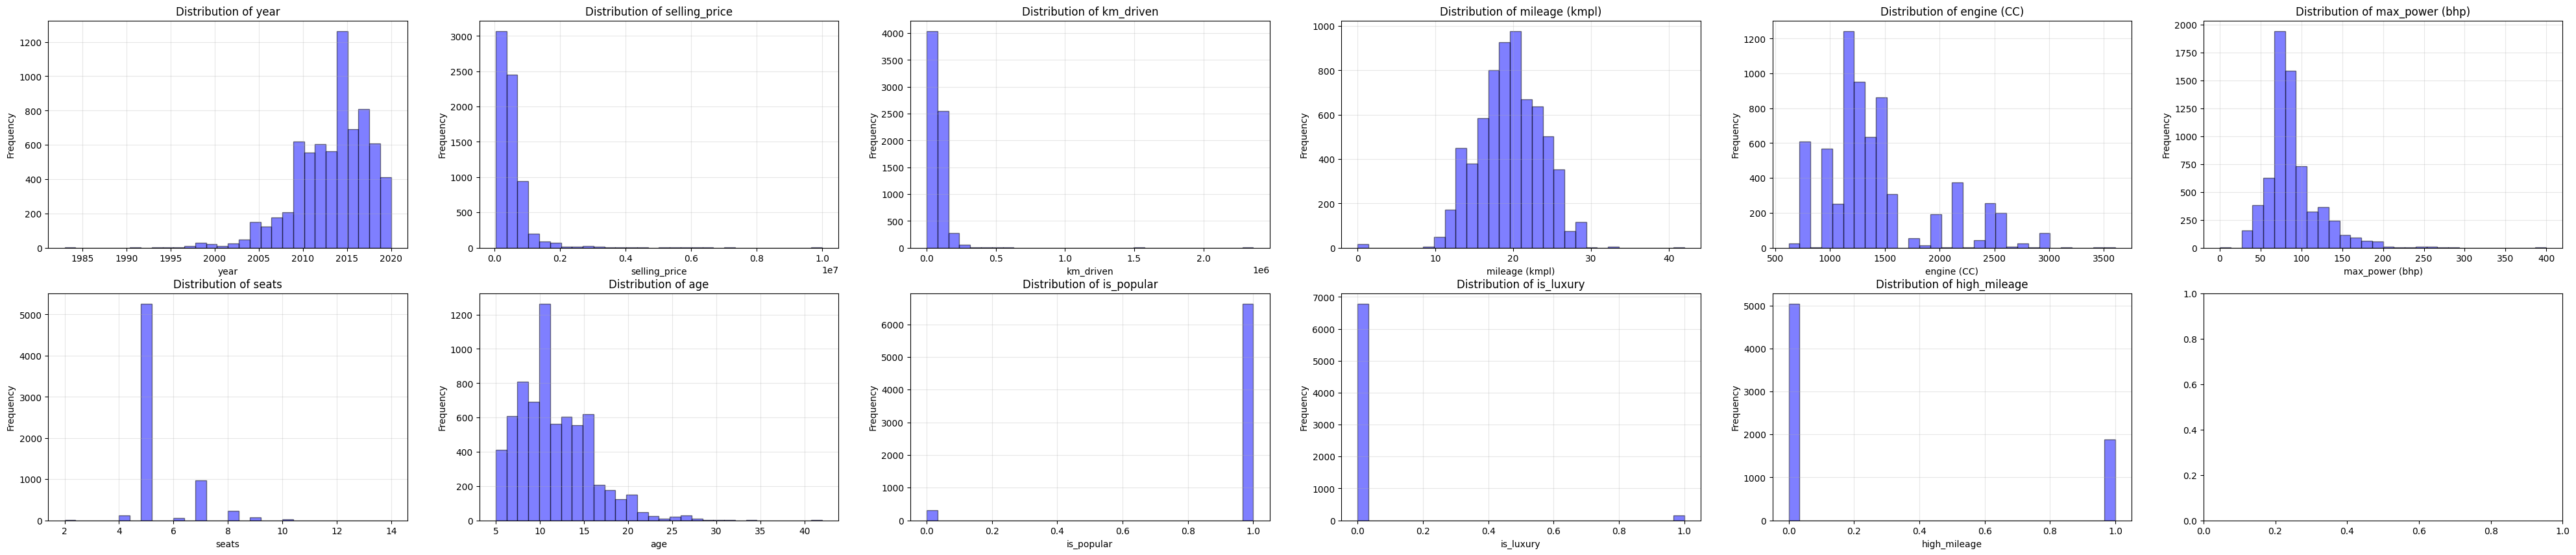

In [68]:
fig, axes = plt.subplots(2, (len(numerical_car_df) + 1) // 2, figsize=(50, 10))
axes = axes.flatten() if len(numerical_car_df) > 1 else [axes]

for i, col in enumerate(numerical_car_df):
  if col in car_df.columns:
    axes[i].hist(car_df[col], bins=30, alpha=0.5, color='blue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel(col)
    axes[i].grid(True, alpha=0.3)

plt.show()

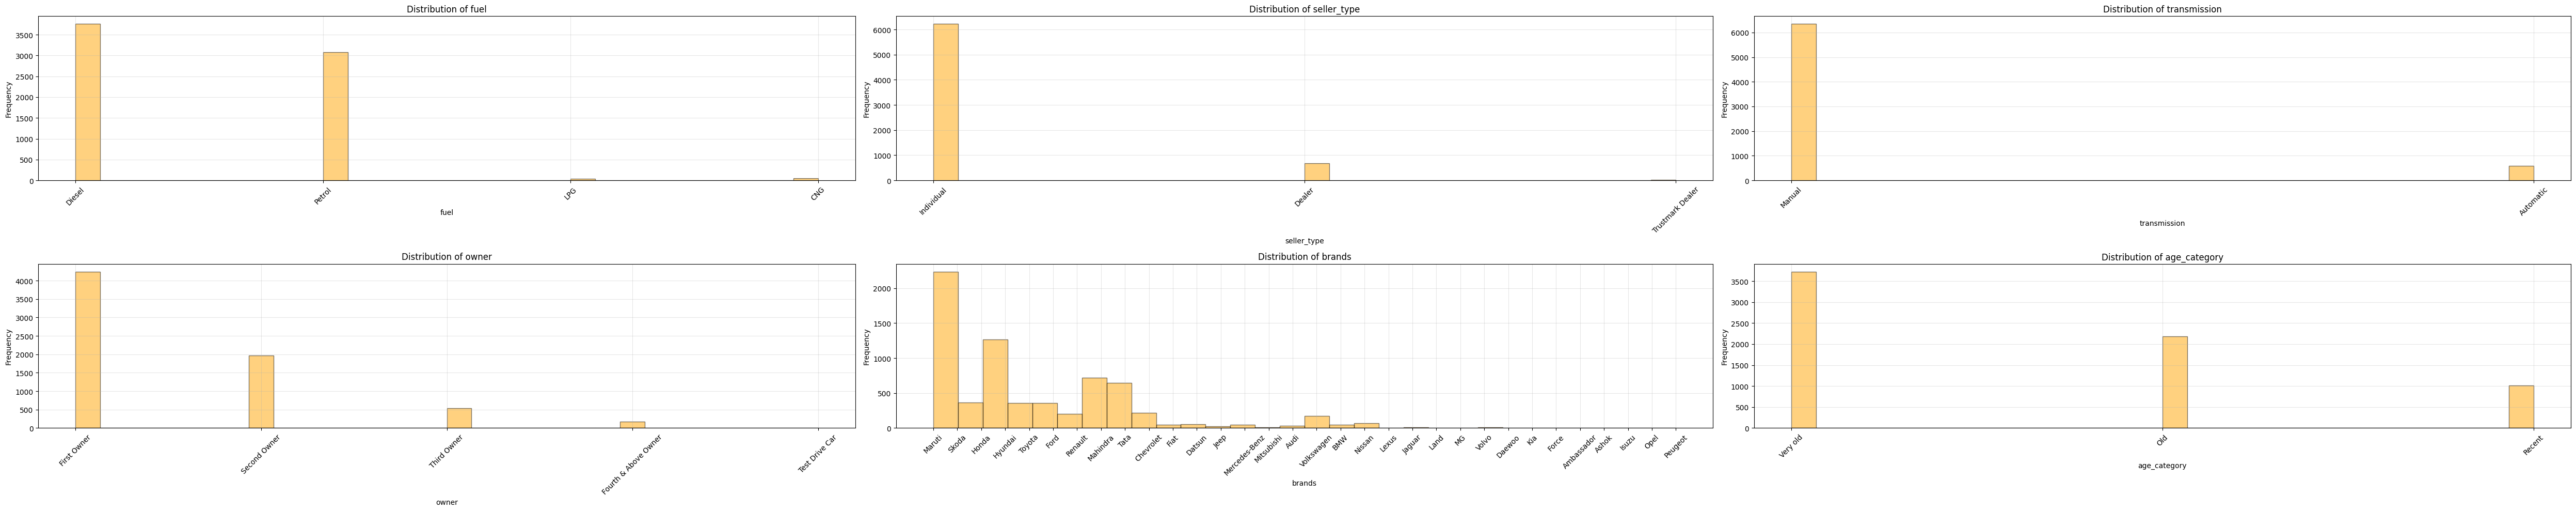

In [69]:
fig, axes = plt.subplots(2, (len(categorical_car_df) + 1) // 2, figsize=(50, 10))
axes = axes.flatten() if len(categorical_car_df) > 1 else [axes]

for i, col in enumerate(categorical_car_df):
    if col in car_df.columns:
        axes[i].hist(car_df[col], bins=30, alpha=0.5, color='orange', edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_ylabel("Frequency")
        axes[i].set_xlabel(col)
        axes[i].grid(True, alpha=0.3)

        # Rotate x-axis labels for this subplot
        for tick in axes[i].get_xticklabels():
            tick.set_rotation(45)

plt.tight_layout()
plt.show()


In [70]:
car_df.describe()

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats,age,is_popular,is_luxury,high_mileage
count,6926.000000,6.926000e+03,6.926000e+03,6718.00000,6718.000000,6720.000000,6718.000000,6926.000000,6926.000000,6926.000000,6926.000000
mean,2013.420300,5.172707e+05,7.399568e+04,19.46531,1430.891337,87.726919,5.434653,11.579700,0.955963,0.021224,0.272740
std,4.078286,5.197670e+05,5.835810e+04,4.04915,493.493277,31.771619,0.984230,4.078286,0.205192,0.144142,0.445401
min,1983.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,0.000000,2.000000,5.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.500000e+05,4.000000e+04,16.80000,1197.000000,67.100000,5.000000,8.000000,1.000000,0.000000,0.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.44000,1248.000000,81.830000,5.000000,11.000000,1.000000,0.000000,0.000000
75%,2017.000000,6.335000e+05,1.000000e+05,22.50000,1498.000000,100.000000,5.000000,14.000000,1.000000,0.000000,1.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,400.000000,14.000000,42.000000,1.000000,1.000000,1.000000


In [71]:
numerical_car_df = car_df.select_dtypes(include={"int64",'float'}).drop(columns={'is_luxury', 'high_mileage','is_popular'}).columns
numerical_car_df

Index(['year', 'selling_price', 'km_driven', 'mileage (kmpl)', 'engine (CC)',
       'max_power (bhp)', 'seats', 'age'],
      dtype='object')

In [72]:
if 'mileage (kmpl)' in car_df.columns:
    car_df['mileage (kmpl)'].fillna(car_df['mileage (kmpl)'].mean(), inplace=True)
if 'engine (CC)' in car_df.columns:
    car_df['engine (CC)'].fillna(car_df['engine (CC)'].mean(), inplace=True)
if 'max_power (bhp)' in car_df.columns:
    car_df['max_power (bhp)'].fillna(car_df['max_power (bhp)'].mean(), inplace=True)
if 'seats' in car_df.columns:
    car_df['seats'].fillna(car_df['seats'].mode()[0], inplace=True)

C:\Users\OS\AppData\Local\Temp\ipykernel_30520\2495134370.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_df['mileage (kmpl)'].fillna(car_df['mileage (kmpl)'].mean(), inplace=True)
C:\Users\OS\AppData\Local\Temp\ipykernel_30520\2495134370.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [73]:
car_df['engine (CC)'] = car_df['engine (CC)'].astype(int)
car_df['seats'] = car_df['seats'].astype(int)

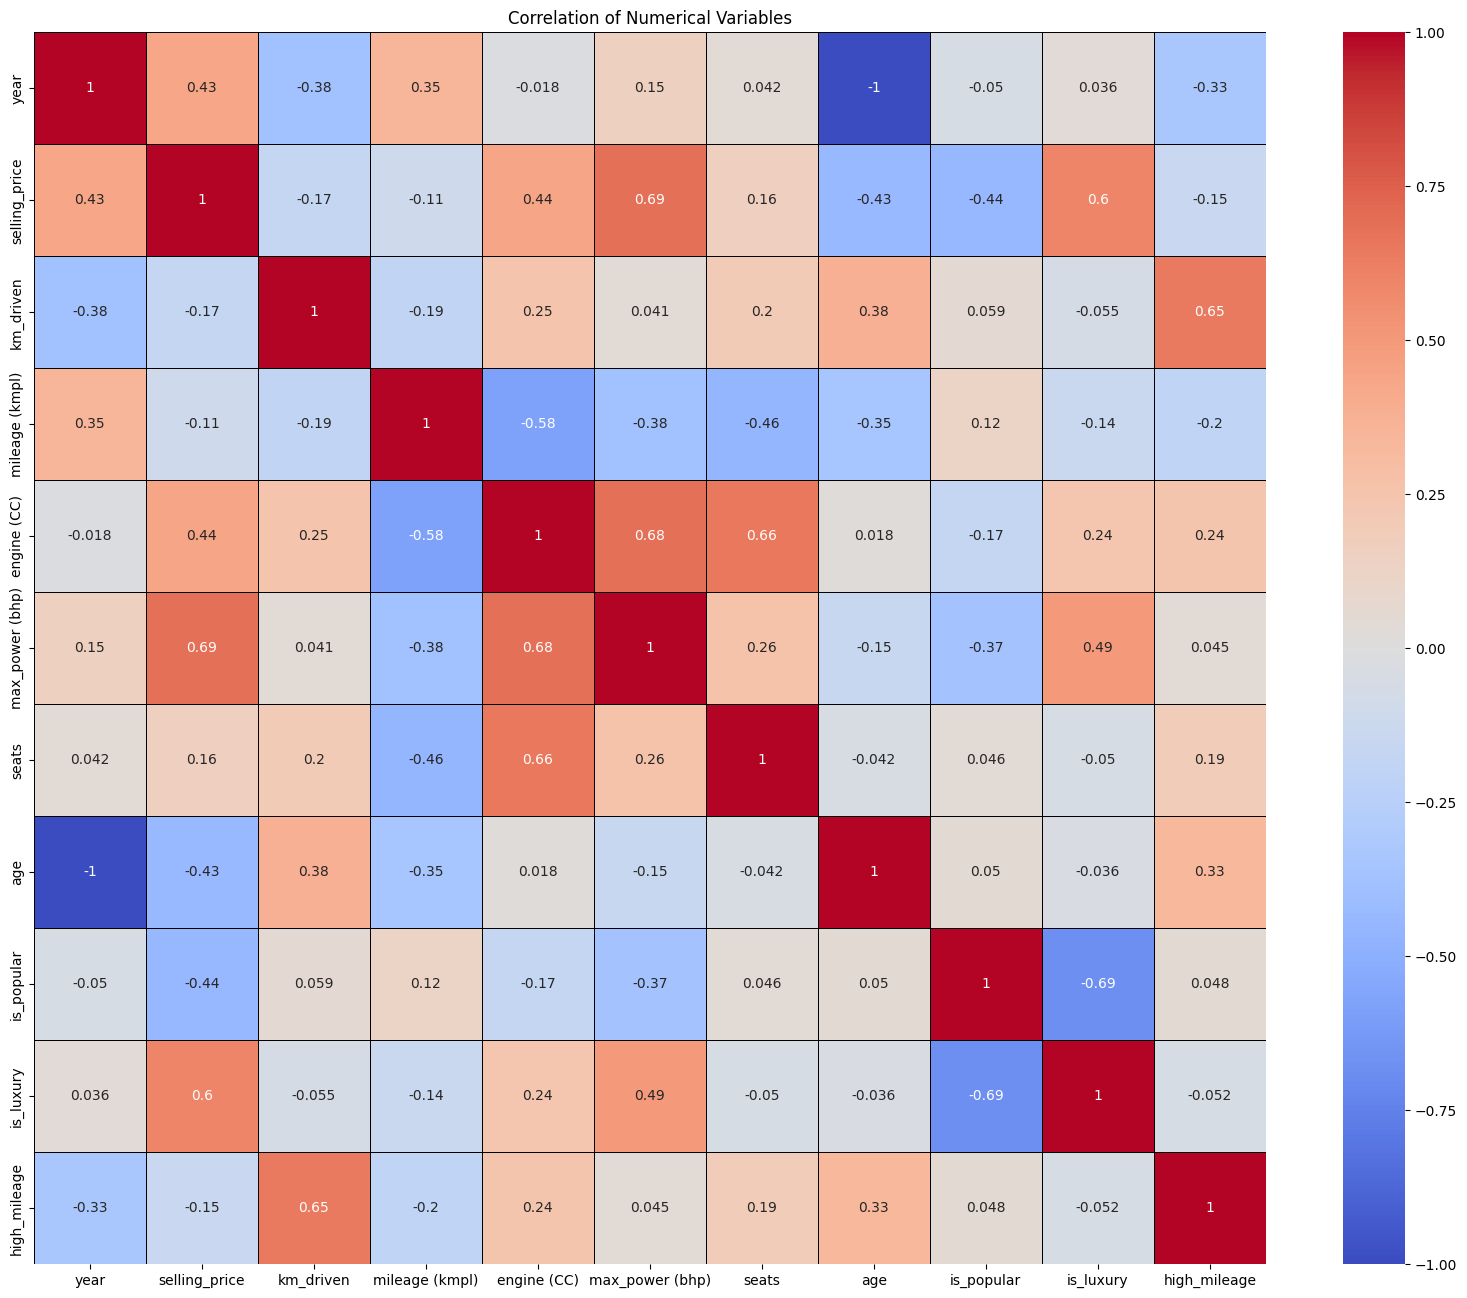

In [74]:
correlation_matrix = car_df.select_dtypes(include={"number"}).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0,
            square=True, linewidths=0.5, linecolor="black")
plt.title('Correlation of Numerical Variables')
plt.show()

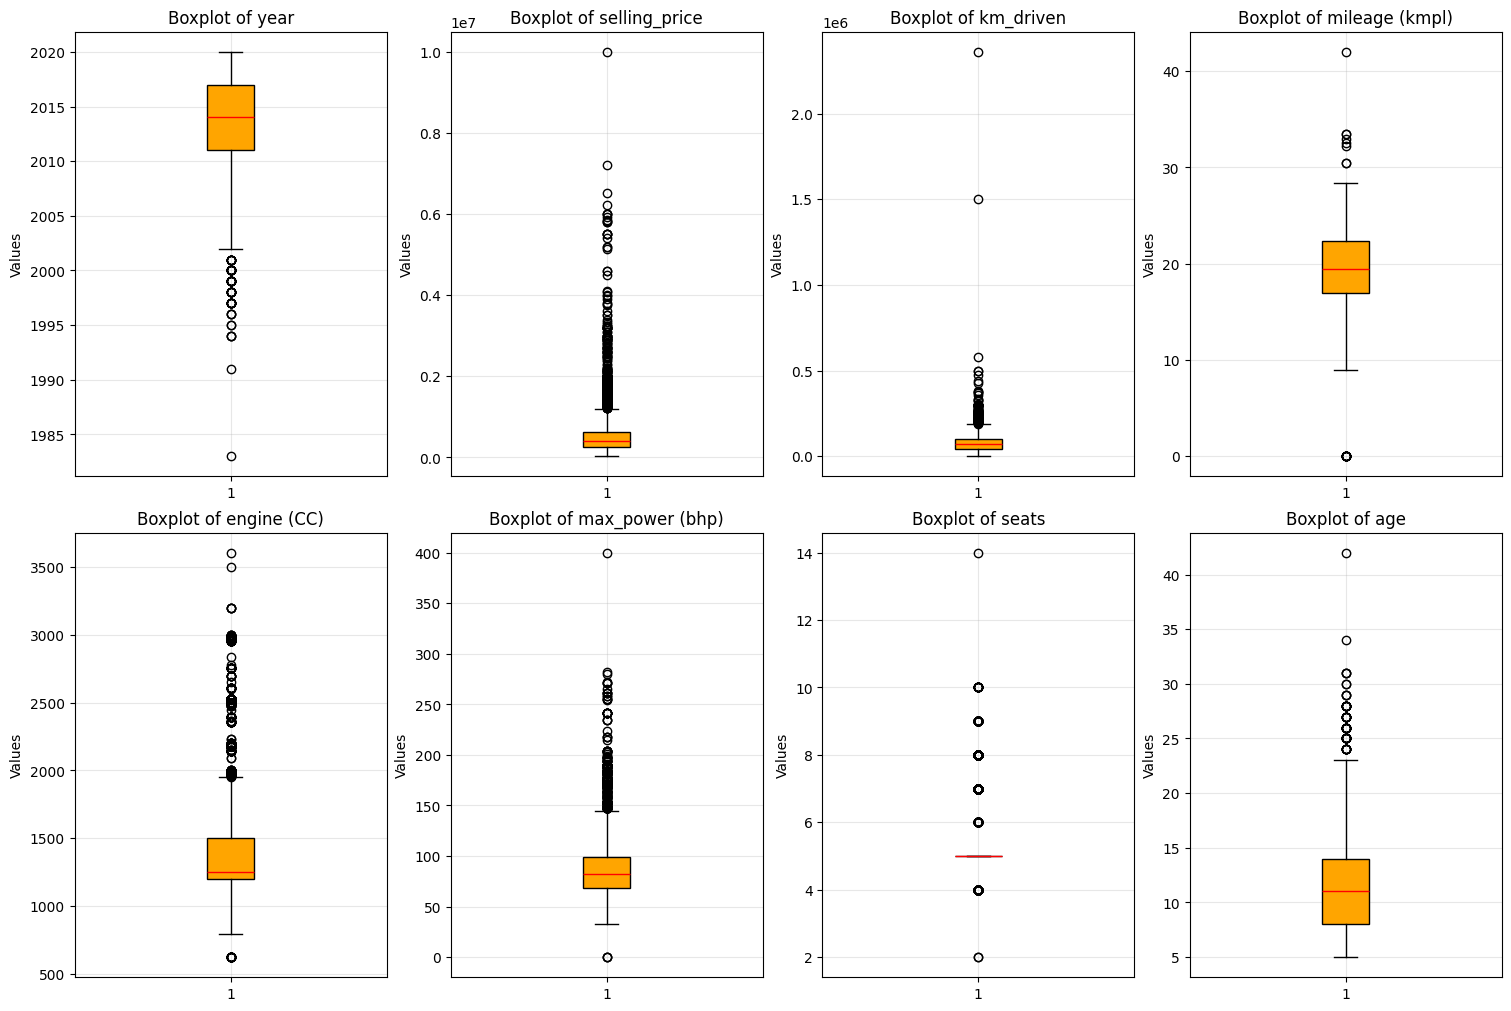

In [75]:
plt.style.use('default')
fig, axe = plt.subplots(2, (len(numerical_car_df) + 1) // 2, figsize=(15, 10), constrained_layout=True)
box = axe.flatten() if len(numerical_car_df) > 1 else axe
for i, col in enumerate(numerical_car_df):
    if col in car_df.columns:
        box[i].boxplot(car_df[col], vert=True, patch_artist=True,
                        boxprops=dict(facecolor='orange', color='black'),
                        medianprops=dict(color='red'))
        box[i].set_title(f'Boxplot of {col}')
        box[i].set_ylabel('Values')
        box[i].grid(True, alpha=0.3)

plt.show()

In [76]:
for col in numerical_car_df:
    lower_percentil = car_df[col].quantile(0.01)
    upper_percentil = car_df[col].quantile(0.99)
    car_df = car_df[(car_df[col] >= lower_percentil) & (car_df[col] <= upper_percentil)]

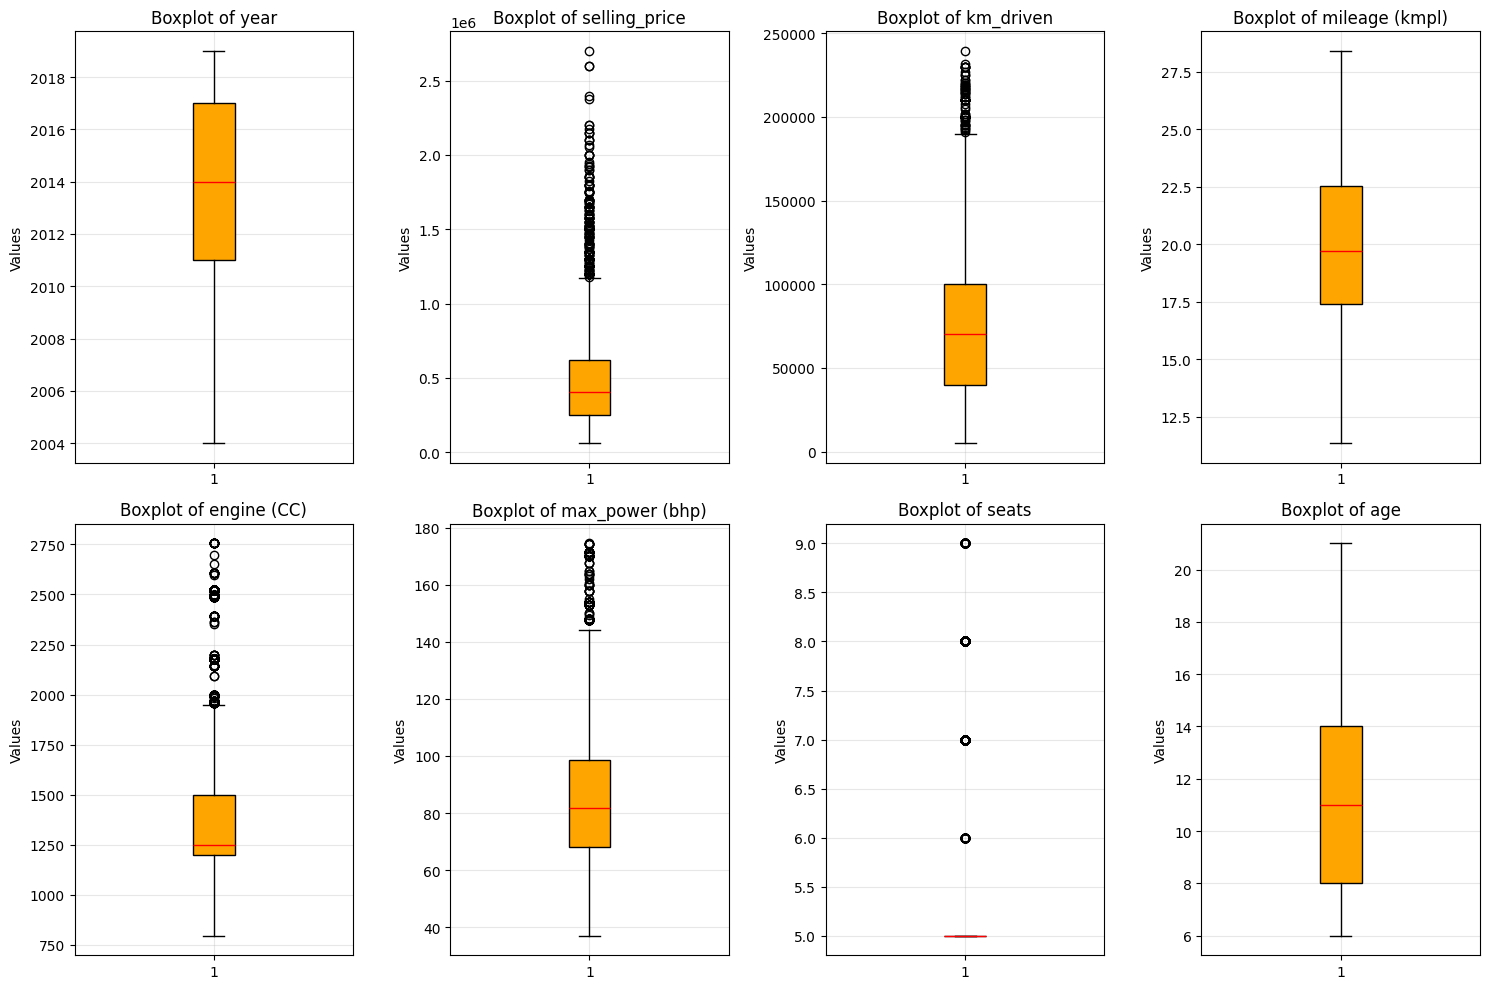

In [77]:
plt.style.use('default')
fig, axe = plt.subplots(2, (len(numerical_car_df) + 1) // 2, figsize=(15, 10))
box = axe.flatten() if len(numerical_car_df) > 1 else axe
for i, col in enumerate(numerical_car_df):
    if col in car_df.columns:
        box[i].boxplot(car_df[col], vert=True, patch_artist=True,
                        boxprops=dict(facecolor='orange', color='black'),
                        medianprops=dict(color='red'))
        box[i].set_title(f'Boxplot of {col}')
        box[i].set_ylabel('Values')
        box[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [78]:
car_df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage (kmpl)     0
engine (CC)        0
max_power (bhp)    0
seats              0
age                0
brands             0
is_popular         0
is_luxury          0
high_mileage       0
age_category       0
dtype: int64

In [79]:
car_df.describe()

,year,selling_price,km_driven,mileage (kmpl),engine (CC),max_power (bhp),seats,age,is_popular,is_luxury,high_mileage
count,6206.000000,6.206000e+03,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000
mean,2013.723816,4.753083e+05,71991.150338,19.827646,1401.495811,85.672928,5.404770,11.276184,0.974218,0.004673,0.268772
std,3.487808,3.089089e+05,42373.213302,3.702219,429.475954,24.246283,0.899746,3.487808,0.158496,0.068204,0.443357
min,2004.000000,6.000000e+04,5000.000000,11.360000,796.000000,37.000000,5.000000,6.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.500000e+05,40000.000000,17.400000,1197.000000,68.050000,5.000000,8.000000,1.000000,0.000000,0.000000
50%,2014.000000,4.065000e+05,70000.000000,19.700000,1248.000000,81.860000,5.000000,11.000000,1.000000,0.000000,0.000000
75%,2017.000000,6.200000e+05,100000.000000,22.540000,1498.000000,98.600000,5.000000,14.000000,1.000000,0.000000,1.000000
max,2019.000000,2.700000e+06,239451.000000,28.400000,2755.000000,174.500000,9.000000,21.000000,1.000000,1.000000,1.000000


In [80]:
def fuel_classification(row):
    mileage = row['mileage (kmpl)']
    fuel_type = row['fuel']

    if fuel_type == 'diesel':
        if mileage >= 20:
            return 'Fuel Saver'
        elif mileage >= 15:
            return 'Average'
        else:
            return 'Fuel Waster'

    elif fuel_type == 'petrol':
        if mileage >= 17:
            return 'Fuel Saver'
        elif mileage >= 13:
            return 'Average'
        else:
            return 'Fuel Waster'

    else:  # For CNG, LPG, Electric
        if mileage >= 20:
            return 'Fuel Saver'
        elif mileage >= 15:
            return 'Average'
        else:
            return 'Fuel Waster'

car_df['fuel_efficiency'] = car_df.apply(fuel_classification, axis=1)

In [81]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats,age,brands,is_popular,is_luxury,high_mileage,age_category,fuel_efficiency
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,11,Maruti,1,0,1,Very old,Fuel Saver
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,11,Skoda,1,0,1,Very old,Fuel Saver
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,19,Honda,1,0,1,Very old,Average
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,15,Hyundai,1,0,1,Very old,Fuel Saver
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,18,Maruti,1,0,1,Very old,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,12,Maruti,1,0,0,Very old,Average
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,11,Hyundai,1,0,0,Very old,Fuel Saver
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,12,Hyundai,1,0,1,Very old,Average
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,18,Hyundai,1,0,1,Very old,Average


In [82]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6206 entries, 0 to 8125
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             6206 non-null   object  
 1   year             6206 non-null   int64   
 2   selling_price    6206 non-null   int64   
 3   km_driven        6206 non-null   int64   
 4   fuel             6206 non-null   object  
 5   seller_type      6206 non-null   object  
 6   transmission     6206 non-null   object  
 7   owner            6206 non-null   object  
 8   mileage (kmpl)   6206 non-null   float64 
 9   engine (CC)      6206 non-null   int64   
 10  max_power (bhp)  6206 non-null   float64 
 11  seats            6206 non-null   int64   
 12  age              6206 non-null   int64   
 13  brands           6206 non-null   object  
 14  is_popular       6206 non-null   int64   
 15  is_luxury        6206 non-null   int64   
 16  high_mileage     6206 non-null   int64   
 17  

In [83]:
for col in numerical_car_df:
  print("="*60)
  print(col)
  numerical_df = pd.DataFrame({
      "Values" : car_df[col].value_counts().index,
      "Count" : car_df[col].value_counts().values
  })
  print(numerical_df)


year
    Values  Count
0     2017    775
1     2016    653
2     2015    646
3     2018    564
4     2012    560
5     2014    550
6     2013    530
7     2011    510
8     2010    348
9     2019    298
10    2009    220
11    2008    181
12    2007    147
13    2006    106
14    2005     78
15    2004     40
selling_price
      Values  Count
0     300000    206
1     350000    193
2     600000    163
3     400000    161
4     250000    158
..       ...    ...
563   563000      1
564   488999      1
565   276000      1
566   372000      1
567  1520000      1

[568 rows x 2 columns]
km_driven
     Values  Count
0    120000    466
1     70000    391
2     80000    379
3     60000    361
4     50000    327
..      ...    ...
792   73500      1
793   35700      1
794   22700      1
795   21147      1
796   77321      1

[797 rows x 2 columns]
mileage (kmpl)
       Values  Count
0    18.90000    197
1    19.46531    166
2    19.70000    155
3    21.10000    146
4    18.60000    143
..      

In [84]:
for col in categorical_car_df:
  print("="*60)
  print(col)
  categorical_df = pd.DataFrame({
      "Values" : car_df[col].value_counts().index,
      "Count" : car_df[col].value_counts().values
  })
  print(categorical_df)


fuel
   Values  Count
0  Diesel   3409
1  Petrol   2722
2     CNG     43
3     LPG     32
seller_type
             Values  Count
0        Individual   5619
1            Dealer    563
2  Trustmark Dealer     24
transmission
      Values  Count
0     Manual   5822
1  Automatic    384
owner
                 Values  Count
0           First Owner   3861
1          Second Owner   1761
2           Third Owner    458
3  Fourth & Above Owner    124
4        Test Drive Car      2
brands
           Values  Count
0          Maruti   1939
1         Hyundai   1199
2        Mahindra    675
3            Tata    571
4            Ford    342
5           Honda    337
6          Toyota    281
7         Renault    204
8       Chevrolet    196
9      Volkswagen    166
10         Nissan     72
11          Skoda     64
12         Datsun     52
13           Fiat     43
14           Jeep     21
15  Mercedes-Benz     15
16           Audi     11
17          Force      4
18             MG      2
19            BMW 

In [85]:
#car_df = car_df[car_df['year'] >= 1995]
#car_df = car_df[car_df['selling_price'] <= 8000000]
#car_df = car_df[car_df['km_driven'] <= 500000]
#car_df = car_df[(car_df['mileage (kmpl)'] <= 40) & (car_df['mileage (kmpl)'] >= 8)]
#car_df = car_df[car_df['age'] <= 35]
#car_df = car_df[(car_df['engine (CC)'] >= 550) & (car_df['engine (CC)'] <= 3000)]
#car_df = car_df[(car_df['max_power (bhp)'] >= 20) & (car_df['max_power (bhp)'] <= 300)]

In [86]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats,age,brands,is_popular,is_luxury,high_mileage,age_category,fuel_efficiency
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,11,Maruti,1,0,1,Very old,Fuel Saver
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,11,Skoda,1,0,1,Very old,Fuel Saver
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,19,Honda,1,0,1,Very old,Average
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,15,Hyundai,1,0,1,Very old,Fuel Saver
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,18,Maruti,1,0,1,Very old,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,12,Maruti,1,0,0,Very old,Average
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,11,Hyundai,1,0,0,Very old,Fuel Saver
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,12,Hyundai,1,0,1,Very old,Average
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,18,Hyundai,1,0,1,Very old,Average


In [87]:
car_df.to_csv('\Streamlit_predict\dataset\Clean_Car_Price_Prediction', index=False)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\OS\AppData\Local\Temp\ipykernel_30520\1672265241.py:1: SyntaxWarning: invalid escape sequence '\S'
  car_df.to_csv('\Streamlit_predict\dataset\Clean_Car_Price_Prediction', index=False)


In [88]:
car_df = pd.read_csv('\Streamlit_predict\dataset\Clean_Car_Price_Prediction')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\OS\AppData\Local\Temp\ipykernel_30520\2875029481.py:1: SyntaxWarning: invalid escape sequence '\S'
  car_df = pd.read_csv('\Streamlit_predict\dataset\Clean_Car_Price_Prediction')


In [89]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats,age,brands,is_popular,is_luxury,high_mileage,age_category,fuel_efficiency
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,11,Maruti,1,0,1,Very old,Fuel Saver
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,11,Skoda,1,0,1,Very old,Fuel Saver
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,19,Honda,1,0,1,Very old,Average
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,15,Hyundai,1,0,1,Very old,Fuel Saver
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,18,Maruti,1,0,1,Very old,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,12,Maruti,1,0,0,Very old,Average
6202,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,11,Hyundai,1,0,0,Very old,Fuel Saver
6203,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,12,Hyundai,1,0,1,Very old,Average
6204,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,18,Hyundai,1,0,1,Very old,Average


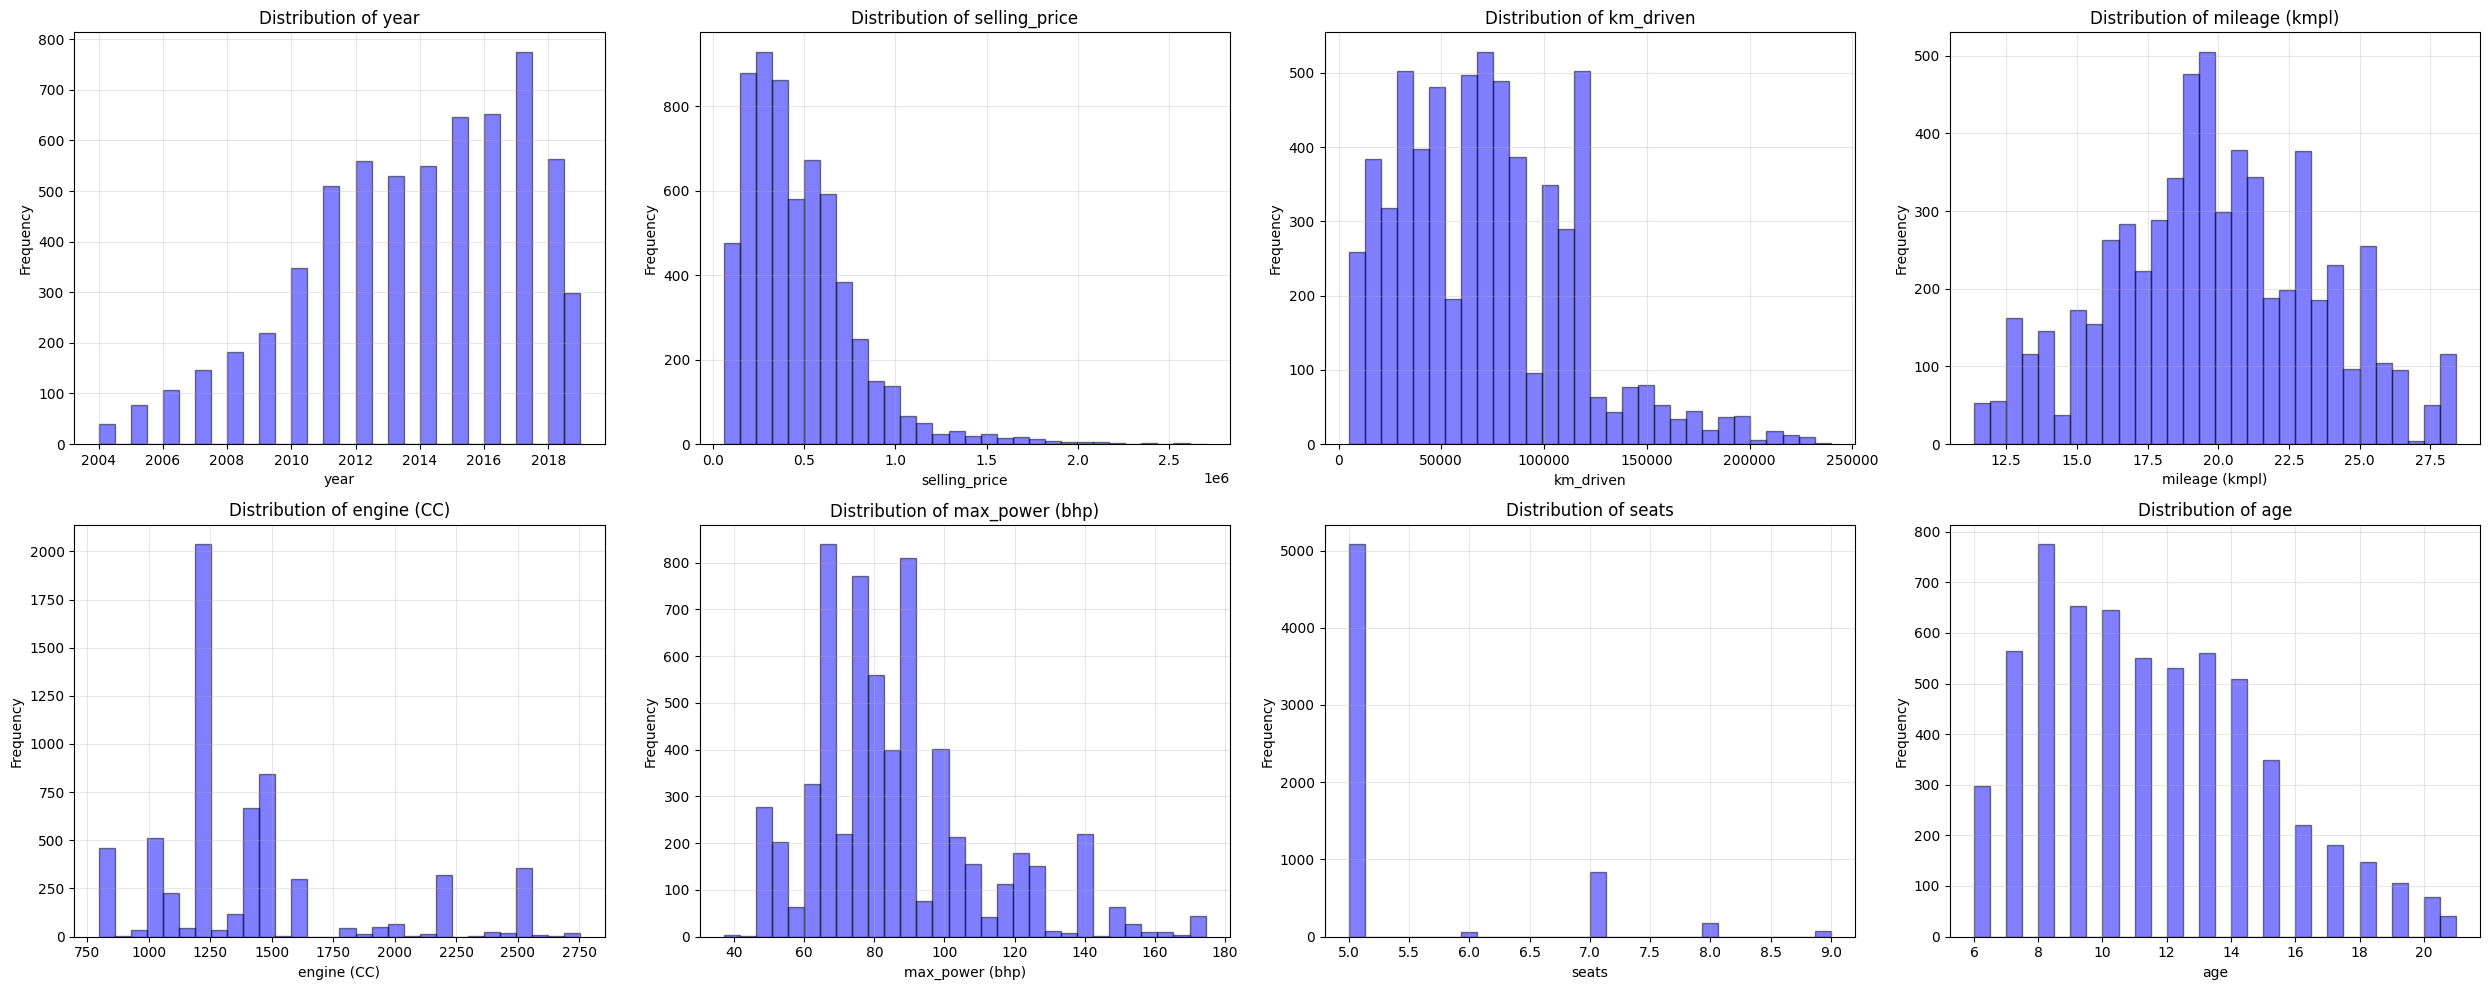

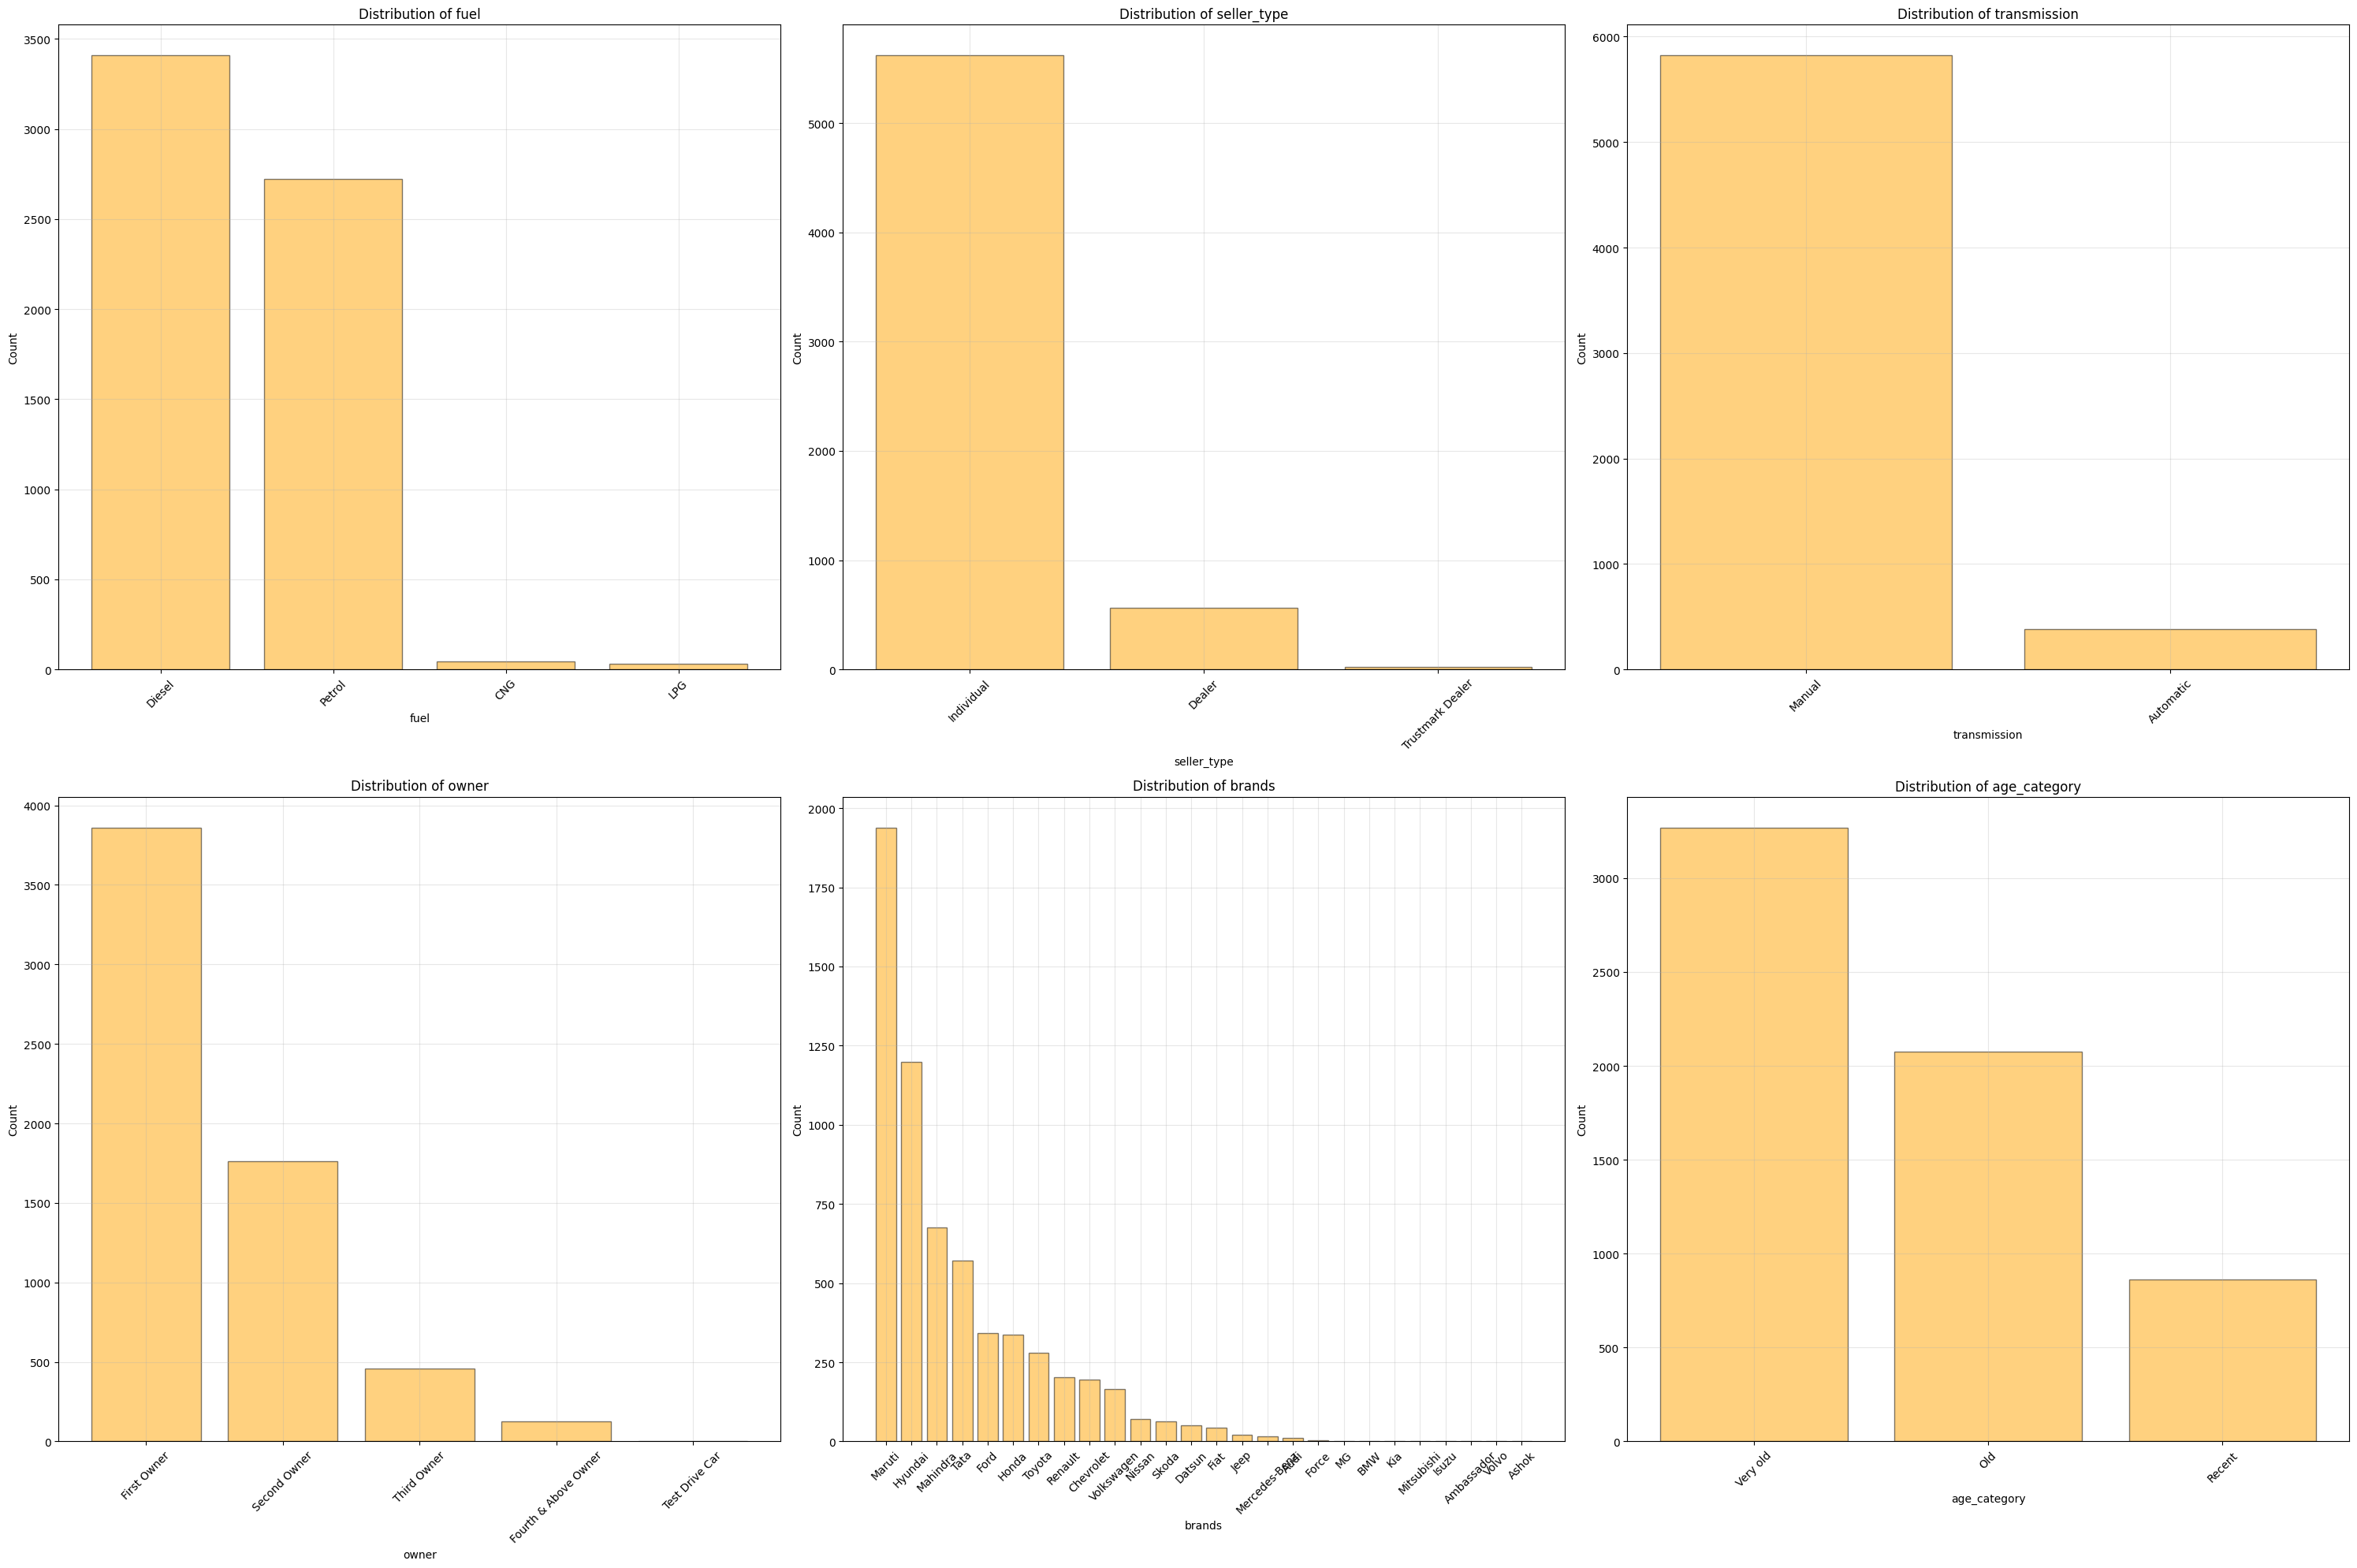

In [90]:
plt.style.use('default')

if len(numerical_car_df) > 0:
    n_num_cols = len(numerical_car_df)
    fig, axes = plt.subplots(2, (n_num_cols + 1) // 2, figsize=(25, 10))
    axes = axes.flatten() if n_num_cols > 1 else [axes]

    for i, col in enumerate(numerical_car_df):
        if col in car_df.columns:
            axes[i].hist(car_df[col], bins=30, alpha=0.5, color='blue', edgecolor='black')
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            axes[i].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if len(categorical_car_df) > 0:
    n_cat_cols = len(categorical_car_df)
    fig, axes = plt.subplots(2, (n_cat_cols + 1) // 2, figsize=(30, 20))
    axes = axes.flatten() if n_cat_cols > 1 else [axes]

    for i, col in enumerate(categorical_car_df):
        if col in car_df.columns:
            axes[i].bar(car_df[col].value_counts().index, car_df[col].value_counts() , alpha=0.5, color='orange', edgecolor="black")
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
            axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


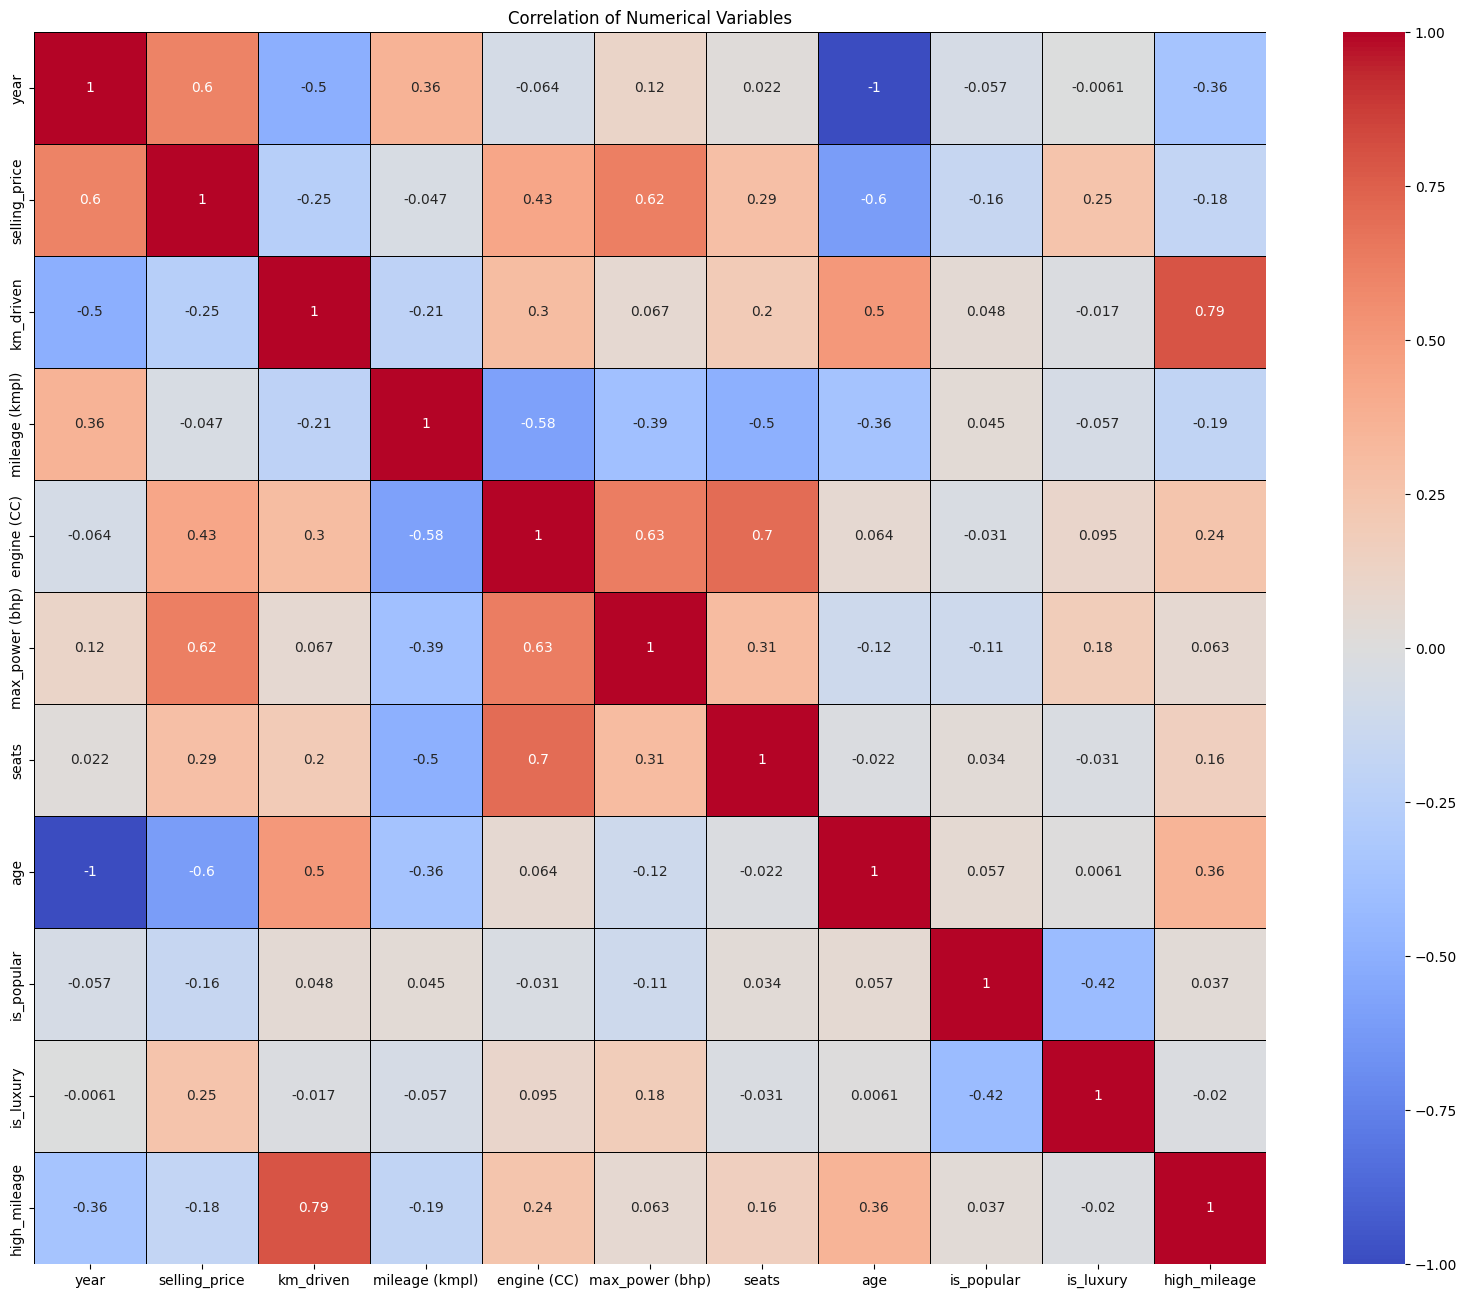

In [91]:
correlation_matrix = car_df.select_dtypes(include={"number"}).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0,
            square=True, linewidths=0.5, linecolor="black")
plt.title('Correlation of Numerical Variables')
plt.show()

In [92]:
car_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats,age,brands,is_popular,is_luxury,high_mileage,age_category,fuel_efficiency
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,11,Maruti,1,0,1,Very old,Fuel Saver
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,11,Skoda,1,0,1,Very old,Fuel Saver
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,19,Honda,1,0,1,Very old,Average
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,15,Hyundai,1,0,1,Very old,Fuel Saver
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,18,Maruti,1,0,1,Very old,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,12,Maruti,1,0,0,Very old,Average
6202,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,11,Hyundai,1,0,0,Very old,Fuel Saver
6203,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,12,Hyundai,1,0,1,Very old,Average
6204,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5,18,Hyundai,1,0,1,Very old,Average


In [93]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

In [94]:
car_df.drop("name", axis=1, inplace=True)

In [95]:
car_df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [96]:
car_df["fuel"] = LabelEncoder.fit_transform(car_df["fuel"])
car_df["fuel"].unique()

array([1, 3, 2, 0])

In [97]:
car_df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [98]:
car_df["seller_type"] = LabelEncoder.fit_transform(car_df["seller_type"])
car_df["seller_type"].unique()

array([1, 0, 2])

In [99]:
car_df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [100]:
car_df["transmission"] = LabelEncoder.fit_transform(car_df["transmission"])
car_df["transmission"].unique()

array([1, 0])

In [101]:
car_df["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [102]:
car_df["owner"] = LabelEncoder.fit_transform(car_df["owner"])
car_df["owner"].unique()

array([0, 2, 4, 1, 3])

In [103]:
car_df["brands"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Datsun', 'Jeep', 'Mercedes-Benz',
       'Audi', 'Volkswagen', 'Nissan', 'BMW', 'MG', 'Kia', 'Fiat',
       'Force', 'Volvo', 'Mitsubishi', 'Ashok', 'Ambassador', 'Isuzu'],
      dtype=object)

In [104]:
car_df["brands"] = LabelEncoder.fit_transform(car_df["brands"])
car_df["brands"].unique()

array([16, 21,  9, 10, 23,  8, 20, 15, 22,  4,  5, 12, 17,  2, 24, 19,  3,
       14, 13,  6,  7, 25, 18,  1,  0, 11])

In [105]:
car_df["age_category"].unique()

array(['Very old', 'Old', 'Recent'], dtype=object)

In [106]:
car_df["age_category"] = LabelEncoder.fit_transform(car_df["age_category"])
car_df["age_category"].unique()

array([2, 0, 1])

In [107]:
car_df['fuel_efficiency'].unique()

array(['Fuel Saver', 'Average', 'Fuel Waster'], dtype=object)

In [108]:
car_df["fuel_efficiency"] = LabelEncoder.fit_transform(car_df["fuel_efficiency"])
car_df["fuel_efficiency"].unique()

array([1, 0, 2])

In [109]:
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage (kmpl),engine (CC),max_power (bhp),seats,age,brands,is_popular,is_luxury,high_mileage,age_category,fuel_efficiency
0,2014,450000,145500,1,1,1,0,23.40,1248,74.00,5,11,16,1,0,1,2,1
1,2014,370000,120000,1,1,1,2,21.14,1498,103.52,5,11,21,1,0,1,2,1
2,2006,158000,140000,3,1,1,4,17.70,1497,78.00,5,19,9,1,0,1,2,0
3,2010,225000,127000,1,1,1,0,23.00,1396,90.00,5,15,10,1,0,1,2,1
4,2007,130000,120000,3,1,1,0,16.10,1298,88.20,5,18,16,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6201,2013,260000,50000,3,1,1,2,18.90,998,67.10,5,12,16,1,0,0,2,0
6202,2014,475000,80000,1,1,1,2,22.54,1396,88.73,5,11,10,1,0,0,2,1
6203,2013,320000,110000,3,1,1,0,18.50,1197,82.85,5,12,10,1,0,1,2,0
6204,2007,135000,119000,1,1,1,1,16.80,1493,110.00,5,18,10,1,0,1,2,0


In [110]:
y = car_df['selling_price']
X = car_df.drop('selling_price', axis=1)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


models = {
    "Linear Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),

    "Ridge Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', GridSearchCV(
            Ridge(),
            param_grid={"alpha": [0.1, 1.0, 10.0]},
            cv=10
        ))
    ]),
    "Lasso Regression": GridSearchCV(
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', Lasso(random_state=42))
        ]),
        param_grid={"model__alpha": [0.001, 0.01, 0.1, 1.0, 10.0]},
        cv=10,
    ),
    "Random Forest": GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid={
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        },
        cv=10,
        n_jobs=-1
    ),

    "Gradient Boosting": GridSearchCV(
        GradientBoostingRegressor(random_state=42),
        param_grid={
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        },
        cv=10,
        n_jobs=-1
    ),

    "XGBoost": GridSearchCV(
        XGBRegressor(random_state=42, verbosity=0),
        param_grid={
            "n_estimators": [100, 200],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        },
        cv=10,
        n_jobs=-1
    ),

}

results = []
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    if hasattr(model, 'best_estimator_'):
        best_model = model.best_estimator_
    elif hasattr(model, 'named_steps') and hasattr(model.named_steps['model'], 'best_estimator_'):
        best_model = model
    else:
        best_model = model

    trained_models[name] = best_model

    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "Train R²": round(r2_train, 3),
        "Test R²": round(r2_test, 3),
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2)
    })

results_car_df = pd.DataFrame(results)
print("="*60)
print("Model Performance Comparison:")
print(results_car_df)


Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...


C:\Users\OS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.539e+11, tolerance: 3.714e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\OS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.337e+11, tolerance: 3.870e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\OS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-package

Training Random Forest...
Training Gradient Boosting...
Training XGBoost...
Model Performance Comparison:
               Model  Train R²  Test R²        MAE       RMSE
0  Linear Regression     0.747    0.736  113404.94  154842.57
1   Ridge Regression     0.747    0.736  113385.53  154848.90
2   Lasso Regression     0.747    0.736  113404.94  154842.57
3      Random Forest     0.973    0.886   66799.70  101696.78
4  Gradient Boosting     0.966    0.895   64583.00   97784.77
5            XGBoost     0.962    0.896   64576.10   97150.58


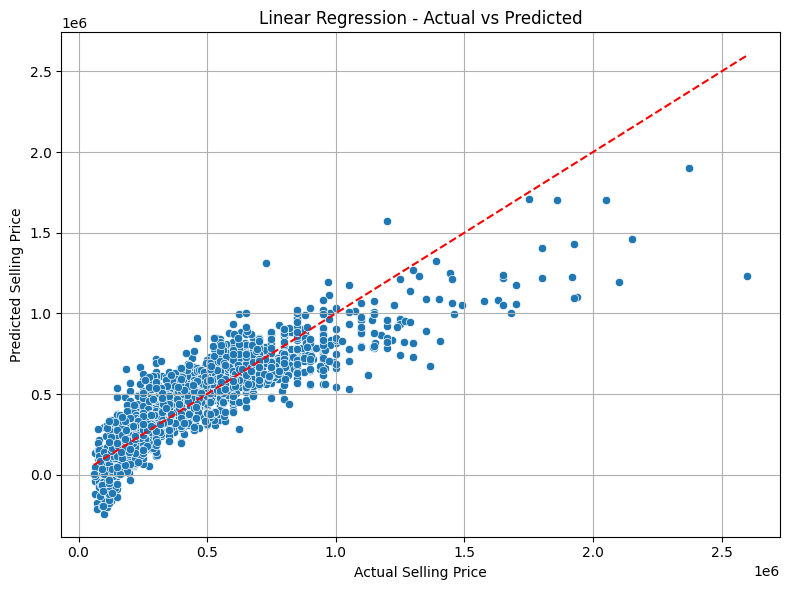

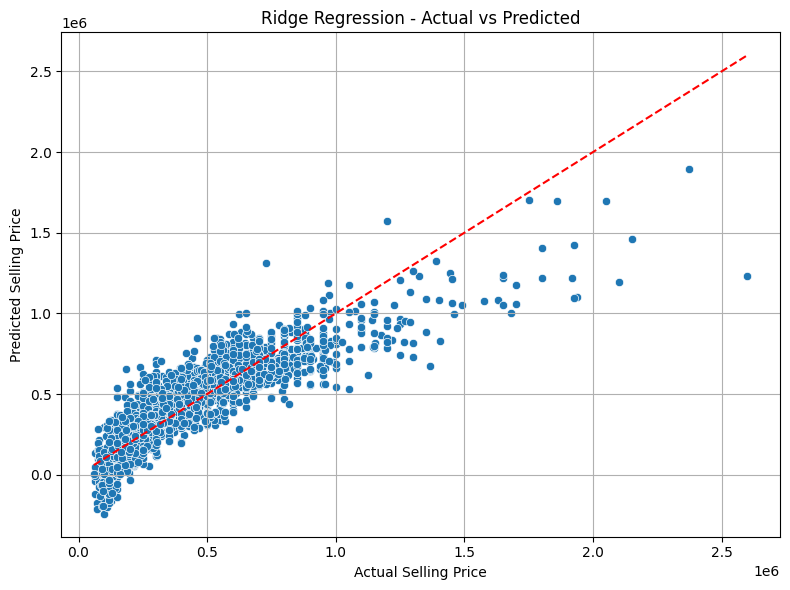

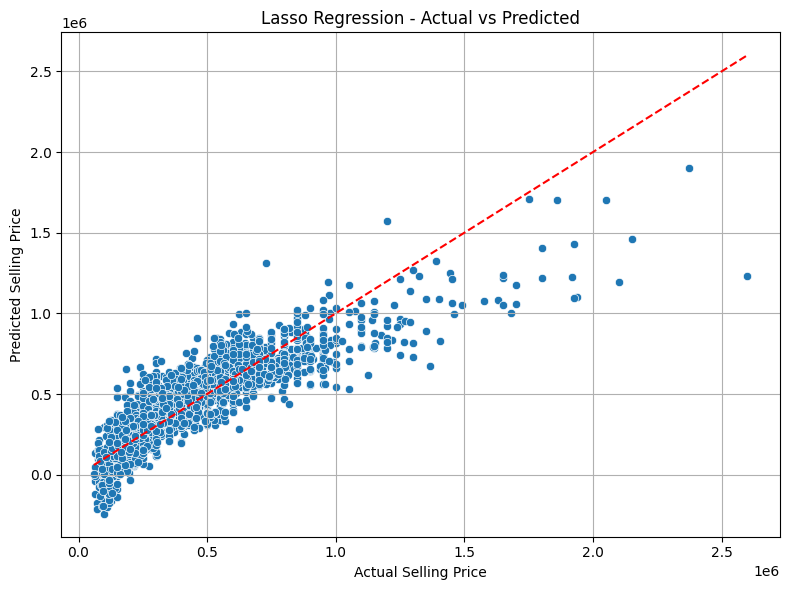

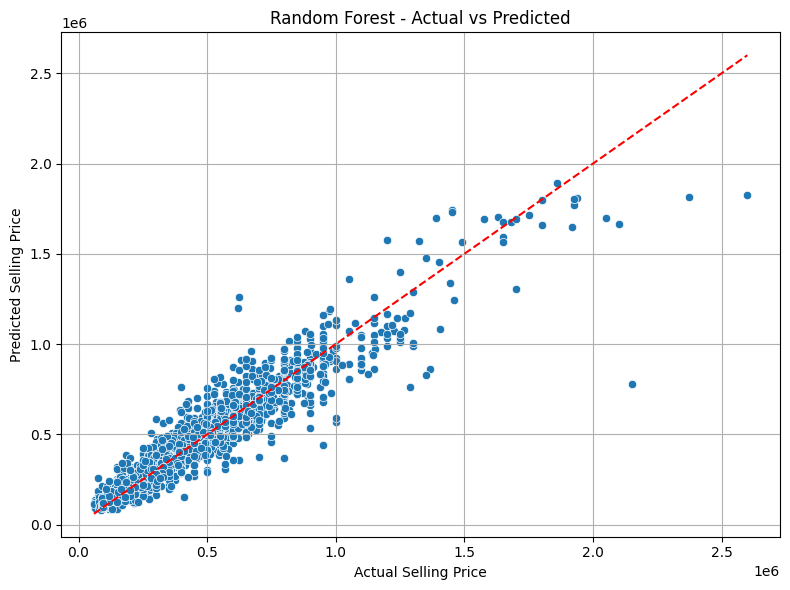

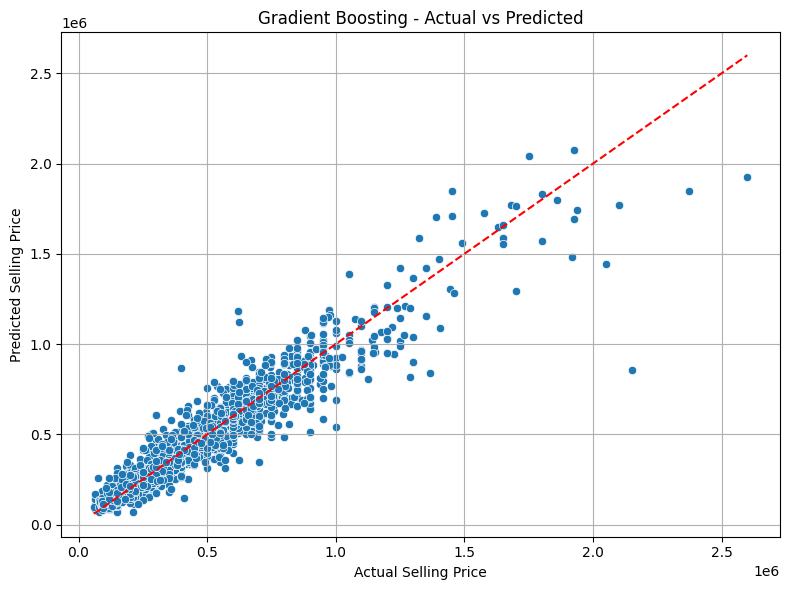

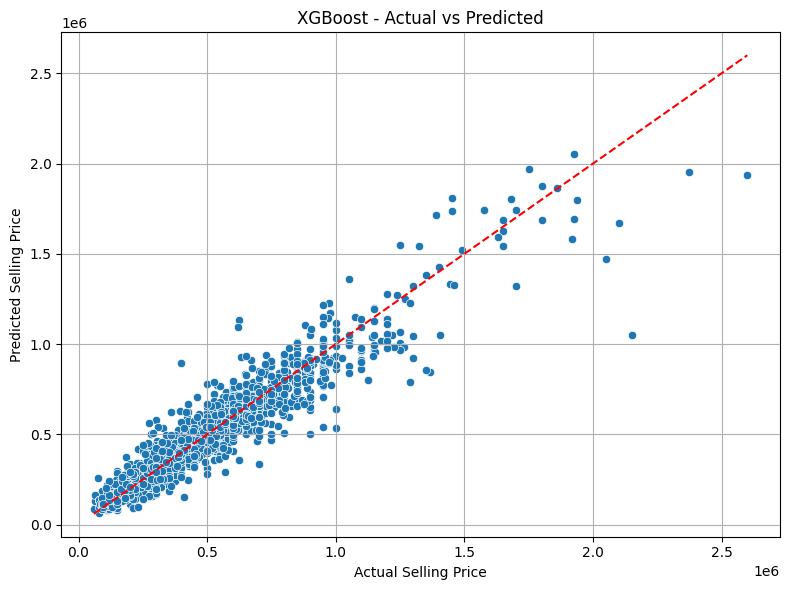

In [ ]:
def plot_fit_graph(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Selling Price")
    plt.ylabel("Predicted Selling Price")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


for name, model in models.items():
    plot_fit_graph(model, X_test, y_test, name)

In [114]:
import joblib

best_model_name = results_car_df.loc[results_car_df['Test R²'].idxmax(), 'Model']
best_model = trained_models[best_model_name]
filename = best_model_name.lower().replace(" ", "_") + "_car_price_model.pkl"
joblib.dump(best_model, filename)


['xgboost_car_price_model.pkl']


Top Feature Importances (XGBoost):
                 Built-in Importance  Permutation Importance  Avg Importance
Feature                                                                     
year                          0.2118                  0.6411          0.4264
max_power (bhp)               0.2060                  0.5251          0.3656
is_luxury                     0.2169                  0.0071          0.1120
engine (CC)                   0.0939                  0.0959          0.0949
is_popular                    0.1337                  0.0096          0.0716
brands                        0.0236                  0.0464          0.0350
mileage (kmpl)                0.0166                  0.0353          0.0259
fuel                          0.0161                  0.0201          0.0181
km_driven                     0.0075                  0.0278          0.0177
transmission                  0.0221                  0.0090          0.0156


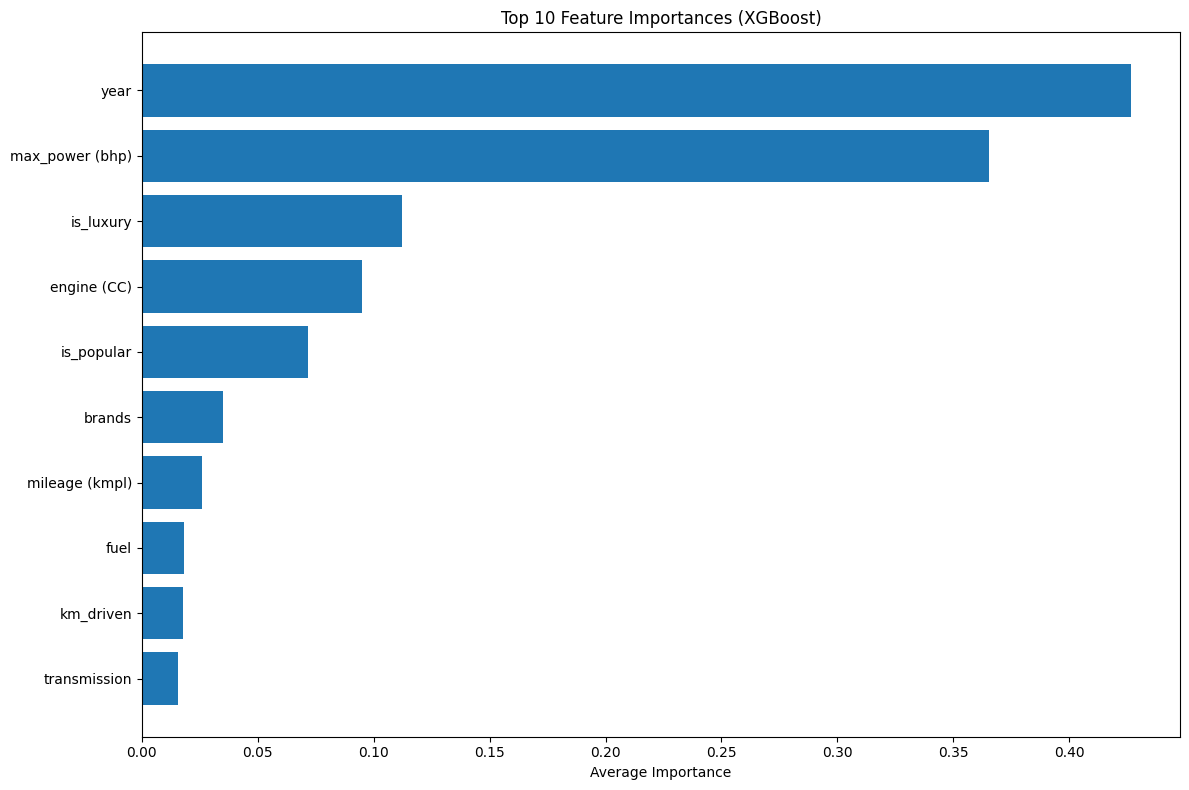

In [ ]:
from sklearn.inspection import permutation_importance

importance_data = []

name = 'XGBoost'
model = trained_models['XGBoost']

if isinstance(model, Pipeline):
    model = model.named_steps['model']

if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    for i, feature in enumerate(X_test.columns):
        importance_data.append({
            'Model': name,
            'Feature': feature,
            'Built-in Importance': importances[i],
            'Permutation Importance': perm_importance.importances_mean[i],
            'Avg Importance': (importances[i] + perm_importance.importances_mean[i]) / 2
        })

importance_df = pd.DataFrame(importance_data)

feature_summary = importance_df[['Feature', 'Built-in Importance', 'Permutation Importance', 'Avg Importance']].set_index('Feature')
feature_summary = feature_summary.sort_values('Avg Importance', ascending=False)

print("\nTop Feature Importances (XGBoost):")
print(feature_summary.head(10).round(4))

plt.figure(figsize=(12, 8))
top_n = 10
plt.barh(range(top_n), feature_summary['Avg Importance'].head(top_n))
plt.yticks(range(top_n), feature_summary.head(top_n).index)
plt.xlabel("Average Importance")
plt.title("Top 10 Feature Importances (XGBoost)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [116]:
importance_df

,Model,Feature,Built-in Importance,Permutation Importance,Avg Importance
0,XGBoost,year,0.211750,0.641120,0.426435
1,XGBoost,km_driven,0.007546,0.027785,0.017665
2,XGBoost,fuel,0.016095,0.020079,0.018087
3,XGBoost,seller_type,0.003985,0.000639,0.002312
4,XGBoost,transmission,0.022142,0.008997,0.015569
5,XGBoost,owner,0.008713,0.004385,0.006549
6,XGBoost,mileage (kmpl),0.016560,0.035274,0.025917
7,XGBoost,engine (CC),0.093947,0.095866,0.094907
8,XGBoost,max_power (bhp),0.205973,0.525138,0.365556
9,XGBoost,seats,0.020471,0.007580,0.014025
